# After Data Cleaning (run data_clean.py)
# Make Plots

In [1]:
import pandas as pd, numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.family'] = 'serif'
plt.style.use('fivethirtyeight')
pd.options.display.float_format = '{:.4f}'.format

In [2]:
trips = pd.read_csv('final_clean_trips.csv')
bikes_day = pd.read_csv('final_bikes_day.csv')
bikes_weather = pd.read_csv('final_bikes_weather.csv')
hours = pd.read_csv('final-hours.csv')
weekdays = pd.read_csv('final-weekdays.csv')
stations_traffic = pd.read_csv('final_station_traffic.csv')
municipals_traffic = pd.read_csv('final_municipals_traffic.csv')

In [3]:
bikes_day.index = bikes_day['start_date'].values
bikes_day = bikes_day.drop('start_date',axis=1)

bikes_weather.index = bikes_weather['Unnamed: 0'].values
bikes_weather = bikes_weather.iloc[:,1:]


# Generated dataframe with metrics of all 
# registered routes of stations

In [4]:
stations_traffic = stations_traffic.drop('Unnamed: 0',axis=1)
stations_traffic.iloc[:,4:] = stations_traffic.iloc[:,4:] / 60 # Divide to it to transfer metrics as minutes
stations_traffic

,fromTo,Travels,Share-of-Totals,AccumulatedShare,mean,std,min,Lower-Quartile,Median,Upper-Quartile,max
0,53:67,5185,0.0033,0.0033,5.0184,5.7511,2.0000,4.0000,4.0000,5.0000,132.0000
1,67:53,4993,0.0032,0.0064,5.0212,5.6357,2.0000,3.0000,4.0000,5.0000,138.0000
2,40:22,4384,0.0028,0.0092,10.9457,120.3750,4.3500,7.0000,7.9833,9.0000,7869.0500
3,22:40,4208,0.0027,0.0119,9.5692,29.6136,4.0000,6.0000,7.0000,8.4000,1195.5500
4,58:58,3126,0.0020,0.0139,50.8468,81.6872,0.0000,22.8458,38.0000,64.4958,3013.1500
...,...,...,...,...,...,...,...,...,...,...,...
15263,129:144,1,0.0000,1.0000,17.0000,NaN,17.0000,17.0000,17.0000,17.0000,17.0000
15264,74:56,1,0.0000,1.0000,40.0000,NaN,40.0000,40.0000,40.0000,40.0000,40.0000
15265,109:93,1,0.0000,1.0000,11.0000,NaN,11.0000,11.0000,11.0000,11.0000,11.0000
15266,85:25,1,0.0000,1.0000,11.2167,NaN,11.2167,11.2167,11.2167,11.2167,11.2167


# Obtained the mean of each station routes
# Print the mean of all stations trips. 
# Do weighted average of trips

In [5]:
stations_mean = (sum(stations_traffic['mean'] * stations_traffic['Travels']) / sum(stations_traffic['Travels']))

# check with stations info
print("the mean time of a trip at station level is {} minutes".\
      format(stations_mean))

the mean time of a trip at station level is 20.004659753117735 minutes


# Plot the total trips made in the series

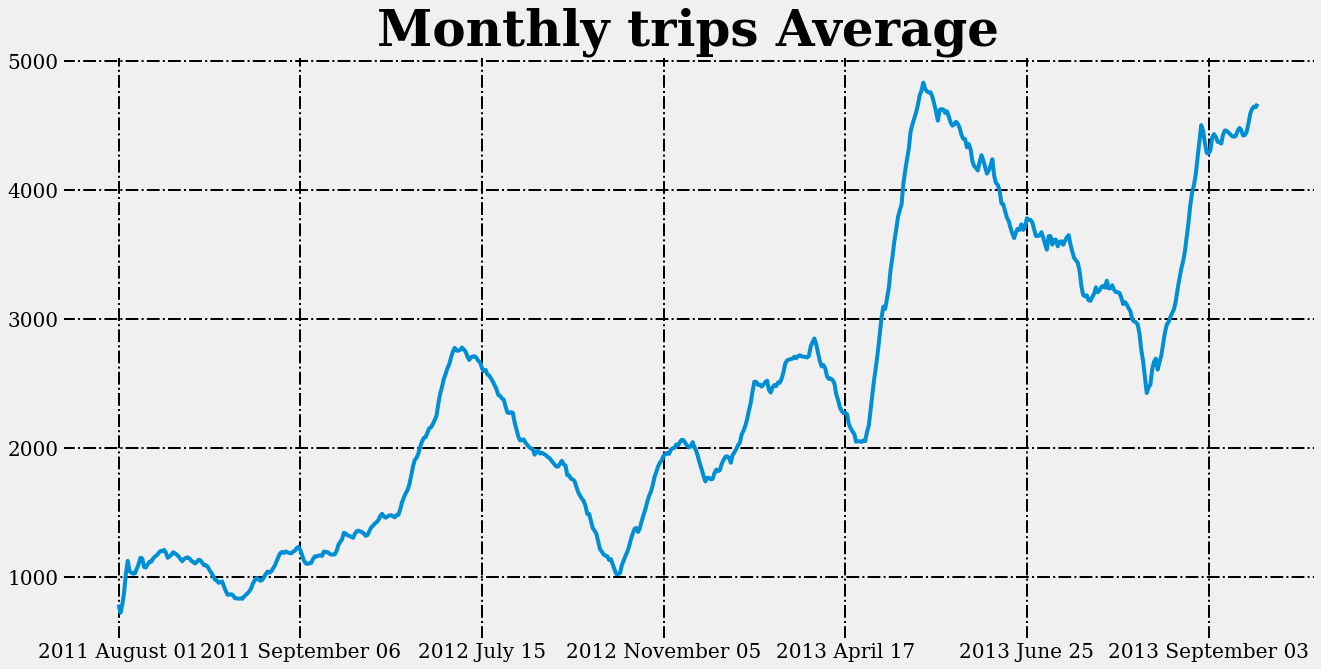

In [6]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)
bikes_day['bike_nr'].rolling(30,min_periods=1).mean().plot(ax=ax1, lw=4.)
ax1.set_title('Monthly trips Average',fontsize=50, fontweight='bold')
ax1.grid(True,color='k',linestyle='-.',linewidth=2)
plt.xticks(size=20)
plt.yticks(size=20)
plt.savefig('trips_monthly_average.png',bbox_inches='tight')

# See the Occupancy of the trips
# in terms of how much bikes were used
# and how much the registered users in fact used it

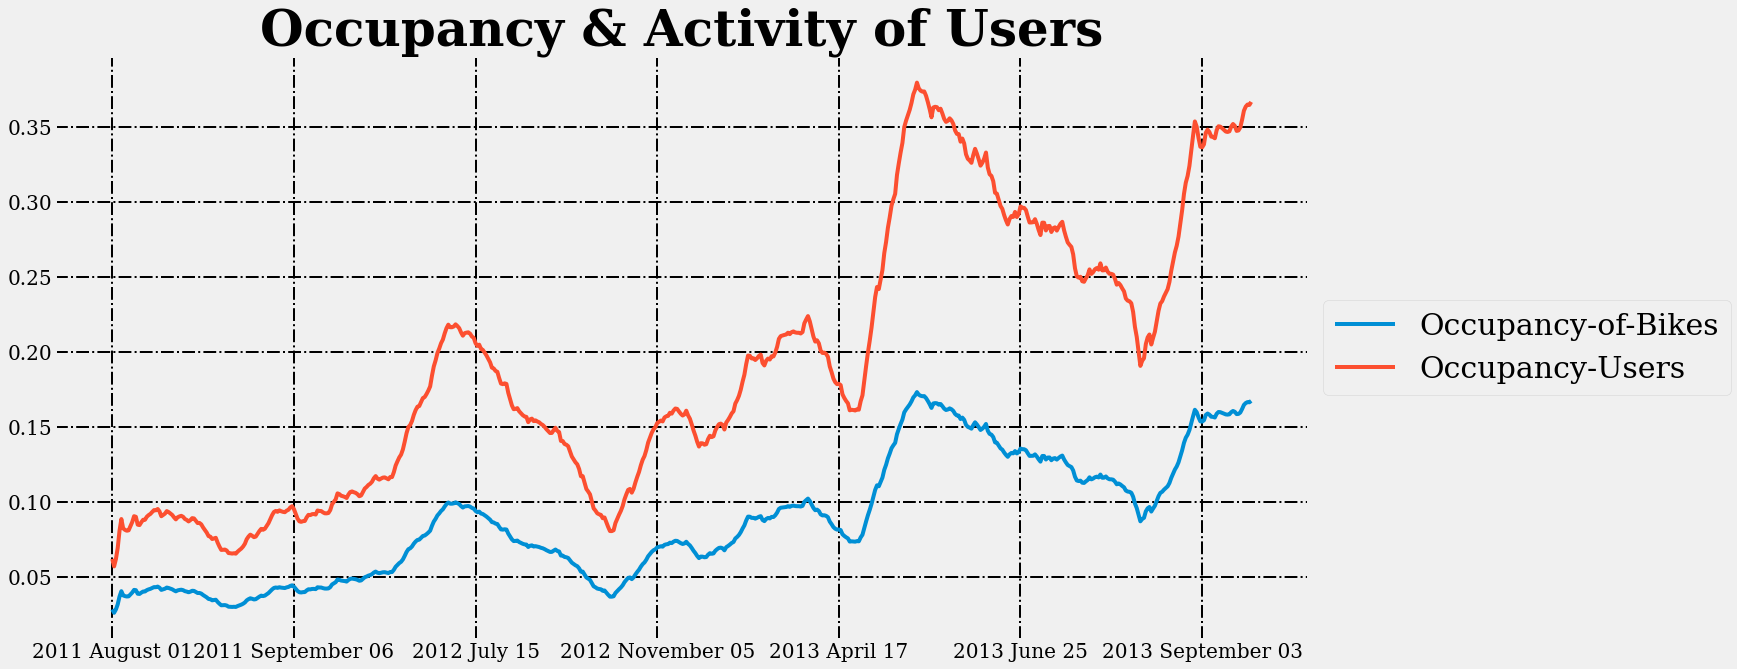

In [7]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)
bikes_day[['Occupancy-of-Bikes','Occupancy-Users']].rolling(30,min_periods=1).mean().plot(ax=ax1, lw=4.)
ax1.set_title('Occupancy & Activity of Users', fontsize=50, fontweight='bold')
ax1.grid(True,color='k',linestyle='-.',linewidth=2)
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.savefig('trips_occupancy_bikesnusers.png',bbox_inches='tight')

In [8]:
bikes_day

,bike_nr,Occupancy-of-Bikes,Occupancy-Users
2011 August 01,788.0000,0.0282,0.0618
2011 August 02,661.0000,0.0237,0.0519
2011 August 03,910.0000,0.0326,0.0714
2011 August 04,1168.0000,0.0418,0.0917
2011 August 05,1614.0000,0.0578,0.1266
...,...,...,...
2013 September 26,5225.0000,0.1870,0.4100
2013 September 27,5127.0000,0.1835,0.4023
2013 September 28,4566.0000,0.1634,0.3583
2013 September 29,3786.0000,0.1355,0.2971


### In terms of bike, the stock available was never threaten, as 
### there is the double of bikes per user (2.19 ratio).
### As in a users perspective, there has been a positive experience
### as the numbers of usage increased 6 times. 

# In another perspective, observe distribution of usage by hours

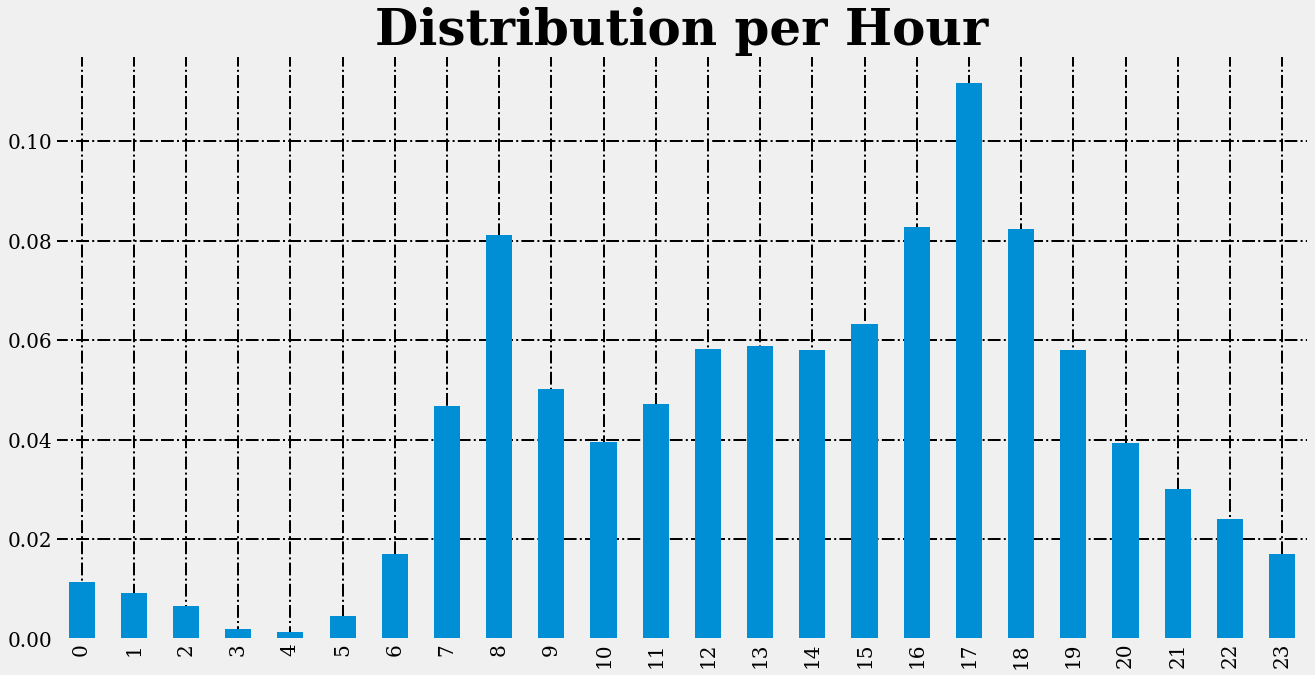

In [9]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)
hours['Distribution'].plot(kind='bar',ax=ax1, lw=4.)
ax1.set_title('Distribution per Hour', fontsize=50, fontweight='bold')
ax1.grid(True,color='k',linestyle='-.',linewidth=2)
plt.xticks(size=20)
plt.yticks(size=20)
plt.savefig('hours_usage.png',bbox_inches='tight')

# Two peaks detected, 8 and 17.

### There is  clear pattern in weekday distribution?

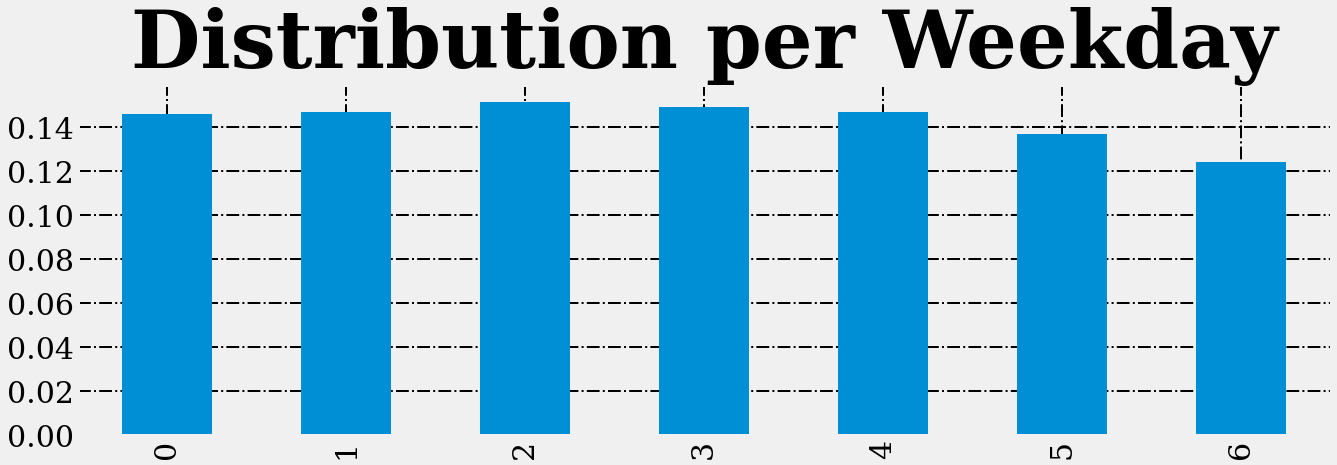

In [10]:
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(111)
weekdays['Distribution'].plot(kind='bar',ax=ax1, lw=2.)
ax1.set_title('Distribution per Weekday', fontsize=80, fontweight='bold')
ax1.grid(True,color='k',linestyle='-.',linewidth=2)
plt.xticks(size=30)
plt.yticks(size=30)
plt.savefig('weekday_distribution.png',bbox_inches='tight')

# There is no significant concentration or peak
# in the distribution during the week

In [11]:
municipals_traffic

,Unnamed: 0,fromMunToMun,Trips,Traffic,Accumulated-Traffic,in_ext,mean_minutes
0,0,Boston:Boston,1089760,0.6901,0.6901,Internal,18.2289
1,1,Cambridge:Cambridge,162901,0.1032,0.7933,Internal,12.5027
2,2,Boston:Cambridge,111176,0.0704,0.8637,External,18.0719
3,3,Cambridge:Boston,110255,0.0698,0.9335,External,18.1376
4,4,Cambridge:Somerville,21037,0.0133,0.9469,External,13.6248
5,5,Somerville:Cambridge,20786,0.0132,0.9600,External,13.1349
6,6,Boston:Brookline,14894,0.0094,0.9695,External,19.3970
7,7,Brookline:Boston,14590,0.0092,0.9787,External,16.5996
8,8,Somerville:Somerville,12827,0.0081,0.9868,Internal,14.3873
9,9,Boston:Somerville,6092,0.0039,0.9907,External,26.6005


# Insigths Municipals Routes
### The traffic is 95% focused in Boston, Cambridge and trips between Boston and Cambridge
### The mean 20 minutes per trip under stations routes analysis
### 17.5473 was the mean per travel with only considering municipals as a whole
### The difference between both metrics laysin the accuraccy of the information

In [12]:
print("the mean time of a trip is {}".\
      format(sum(municipals_traffic['mean_minutes'] * municipals_traffic['Trips']) / sum(municipals_traffic['Trips'])))

the mean time of a trip is 17.54731052389924


In [13]:
traffic80pct = len(stations_traffic[stations_traffic.AccumulatedShare<=0.8])/len(stations_traffic)
traffic_quantity = int(traffic80pct * len(stations_traffic))

print("the 80% of all traffic is concentrated in {} routes of {} total.".format(traffic_quantity,len(stations_traffic)))

the 80% of all traffic is concentrated in 3312 routes of 15268 total.


# Weather effect

### We observe there is a negative correlation between rains and travels.
### For plotting purposes, to be in the same scale, we apply Precipitations * Bikes-Trips

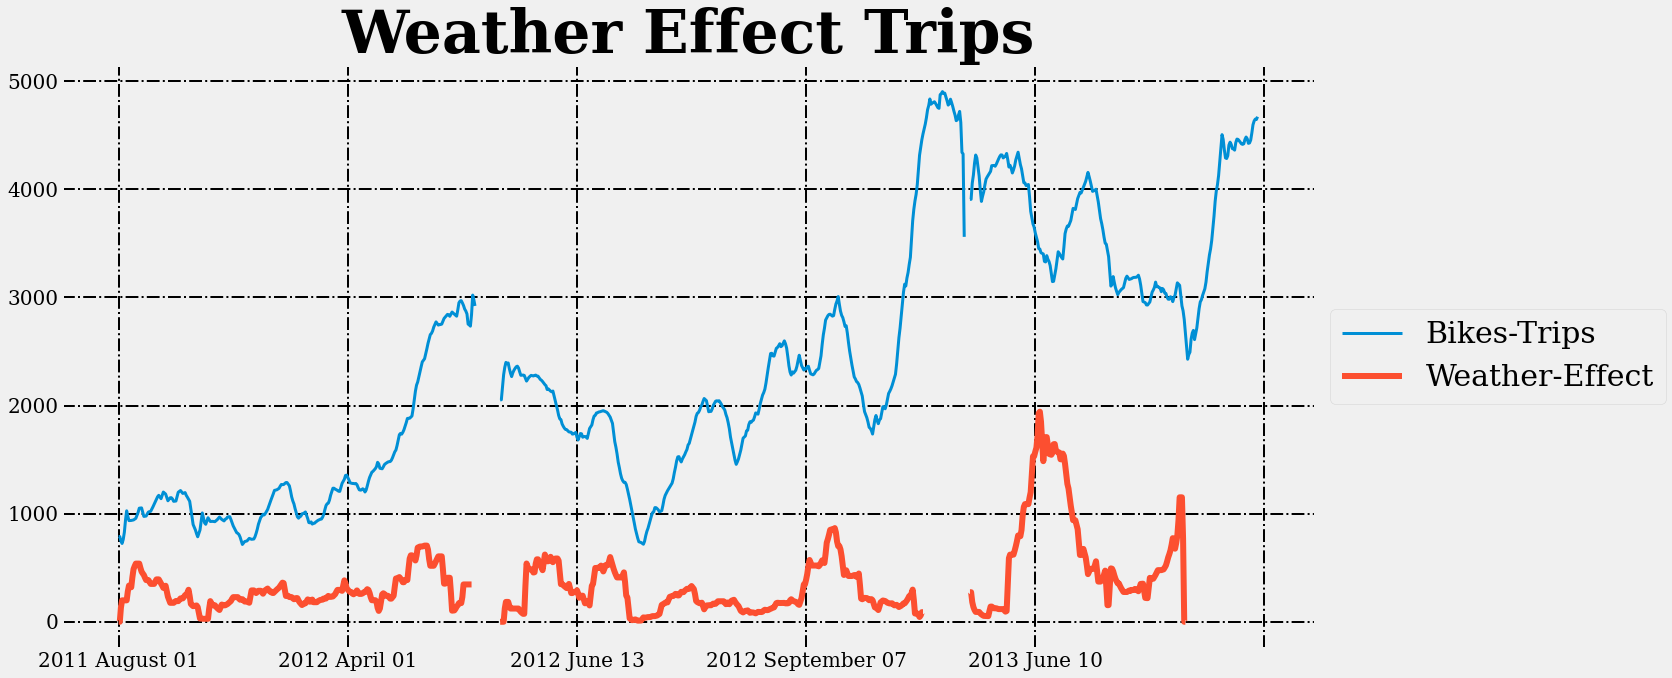

In [14]:
# Just for plotting purposes
bikes_weather['Weather-Effect'] = (bikes_weather['Bikes-Trips']*bikes_weather['Precipitation']).rolling(30,min_periods=1).mean()

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)
bikes_weather['Bikes-Trips'].rolling(30,min_periods=1).mean().plot(ax=ax1, lw=3.)
bikes_weather['Weather-Effect'].plot(ax=ax1, lw=6.)
ax1.set_title('Weather Effect Trips', fontsize=60, fontweight='bold')
ax1.grid(True,color='k',linestyle='-.',linewidth=2)
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.savefig('weatherBikes.png',bbox_inches='tight')

In [15]:
correlation = bikes_weather[['Bikes-Trips','Precipitation']].corr()
correlation

,Bikes-Trips,Precipitation
Bikes-Trips,1.0000,-0.3031
Precipitation,-0.3031,1.0000
